## Name : **Akashdeep Kar**
## Roll : **1911020**

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import seaborn as sns

sns.set_style("dark")


## (1) Solve the following equation to an accuracy of $10^{-6}$ starting from an initial guess interval [1.5,2.5], log(x/2) - sin(5*x/2) using Regula falsi and Newton Raphson and compare the two with respect to convergence using plots.

Regula Falsi root: 2.6231403354363083
Regula Falsi iterations: 12
Newton-Raphson root: 3.528424567707256
Newton-Raphson iterations: 6


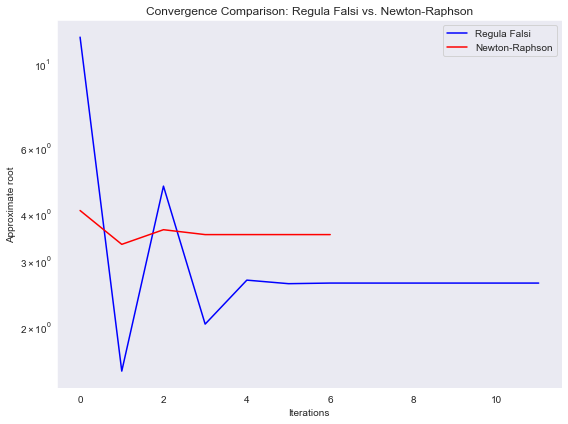

In [58]:
f = lambda x : log(x/2) - sin(5*x/2)
 

 #Newton Raphson Method


def f(x):
    return np.log(x/2) - np.sin(5*x/2)

def f_prime(x):
    return 1/(2*x) - (5/2)*np.cos(5*x/2)

# Regula Falsi Method
def regula_falsi(f, a, b, tol=1e-6, max_iter=1000):
    iterations = 0
    x_vals = []
    errors = []
    
    while iterations < max_iter:
        fa = f(a)
        fb = f(b)
        if np.abs(fa - fb) < tol:
            break
        
        c = (a * fb - b * fa) / (fb - fa)
        fc = f(c)
        x_vals.append(c)
        errors.append(np.abs(fc))
        
        if fa * fc < 0:
            b = c
        else:
            a = c
        iterations += 1
    
    return c, iterations, x_vals, errors

#Newton-Raphson Method
def newton_raphson(f, f_prime, x0, tol=1e-6, max_iter=1000):
    x = x0
    iterations = 0
    x_vals = []
    errors = []
    
    while iterations < max_iter:
        fx = f(x)
        f_prime_x = f_prime(x)
        if np.abs(fx) < tol:
            break
        
        x_new = x - fx / f_prime_x
        x_vals.append(x_new)
        errors.append(np.abs(fx))
        
        if np.abs(x_new - x) < tol:
            break
        
        x = x_new
        iterations += 1
    
    return x, iterations, x_vals, errors

a = 1.5
b = 2.5

regula_falsi_root, rf_iterations, rf_x_vals, rf_errors = regula_falsi(f, a, b)

x0 = (a + b) / 2  
newton_raphson_root, nr_iterations, nr_x_vals, nr_errors = newton_raphson(f, f_prime, x0)


#Plots
print("Regula Falsi root:", regula_falsi_root)
print("Regula Falsi iterations:", rf_iterations)
print("Newton-Raphson root:", newton_raphson_root)
print("Newton-Raphson iterations:", nr_iterations)

plt.figure(figsize=(8, 6))

plt.plot(np.arange(len(rf_x_vals)), rf_x_vals, 'b-', label='Regula Falsi')

plt.plot(np.arange(len(nr_x_vals)), nr_x_vals, 'r-', label='Newton-Raphson')

plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Approximate root')
plt.title('Convergence Comparison: Regula Falsi vs. Newton-Raphson')
plt.legend()

plt.tight_layout()
plt.show()


## (2) Equation for heat conduction in a thin uninsulated rod of lenth L=10m is $d^2T/dx^2 + a(T_a -T)$ = 0. a=0.01$m^{-2}$ and $T_a = 20^oC$ if $T(x=0)=40^oC$ and $T(x=L) = 200^oC$. Solve the **BVP** using **Shooting Method** and **RK4 Integrator** and determine at what x is the temperature $T=100^oC$

Position where the temperature is 100°C: 7.05 m


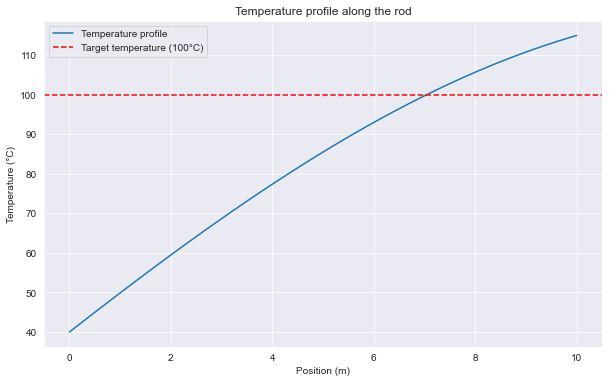

In [59]:
import numpy as np
import matplotlib.pyplot as plt

L = 10.0  
a = 0.01  #coefficient
Ta = 20.0  #ambient temperature
T0 = 40.0  #initial temperature at x=0
TL = 200.0  #temperature at x=L
T_target = 100.0  #target temperature

def dT_dx(x, T):
    return T[1], a * (Ta - T[0])

#RK4 method 
def rk4(f, x0, y0, h, x_end):
    n = int((x_end - x0) / h)
    x_values = np.linspace(x0, x_end, n + 1)
    y_values = np.zeros((len(x_values), len(y0)))
    y_values[0] = y0
    
    for i in range(n):
        k1 = h * np.array(f(x_values[i], y_values[i]))
        k2 = h * np.array(f(x_values[i] + 0.5*h, y_values[i] + 0.5*k1))
        k3 = h * np.array(f(x_values[i] + 0.5*h, y_values[i] + 0.5*k2))
        k4 = h * np.array(f(x_values[i] + h, y_values[i] + k3))
        y_values[i+1] = y_values[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return x_values, y_values

#Shooting method with boundary condition at x=L
def shooting_method(target, x0, slope_guess, tol=1e-6):
    def residual(slope_guess):
        x_values, T_values = rk4(dT_dx, 0, [T0, slope_guess], 0.01, L)
        return T_values[-1, 0] - target
    
    a = 0.0
    b = 10.0
    while b - a > tol:
        m = (a + b) / 2
        if residual(m) * residual(a) < 0:
            b = m
        else:
            a = m
    
    return (a + b) / 2

slope_guess = 0.0  
slope_final = shooting_method(TL, 0, slope_guess)
x_values, T_values = rk4(dT_dx, 0, [T0, slope_final], 0.01, L)

#Determine the position where the temperature is 100 degree centigrade
x_at_100_degrees = None
for i in range(len(x_values)):
    if T_values[i, 0] >= T_target:
        x_at_100_degrees = x_values[i]
        break

print("Position where the temperature is 100°C:", x_at_100_degrees, "m")

#Plots
plt.figure(figsize=(10, 6))
plt.plot(x_values, T_values[:, 0], label='Temperature profile')
plt.axhline(y=T_target, color='r', linestyle='--', label='Target temperature (100°C)')
plt.xlabel('Position (m)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature profile along the rod')
plt.legend()
plt.grid(True)
plt.show()



## (3) Solve the 1d heat equation $u_{xx} = u_t$ over a conducting bar of 2 length units, kept at $0^oC$ but is heated to $300^oC$ at its centre at t=0. Choose your $\Delta x$ and $\Delta t$ such that $\Delta t/(\Delta x)^2$ << 0.5 (Using **Crank-Nicholson Method**)

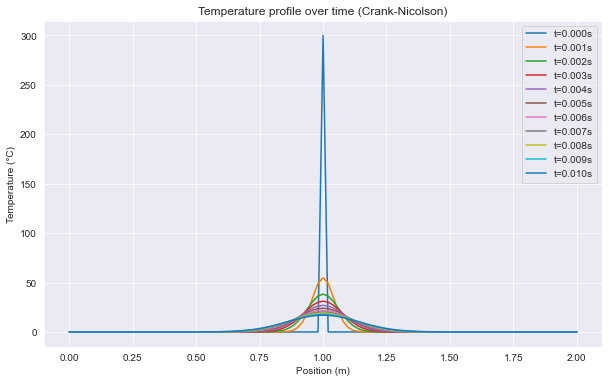

                0.00          0.02          0.04          0.06          0.08  \
0.0000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
0.0001  8.961482e-48  8.065333e-47  7.975719e-46  7.895065e-45  7.815308e-44   
0.0002  7.300575e-46  6.427133e-45  6.225082e-44  6.033199e-43  5.844628e-42   
0.0003  2.962328e-44  2.550720e-43  2.419553e-42  2.295720e-41  2.176257e-40   
0.0004  7.984311e-43  6.723445e-42  6.245641e-41  5.801111e-40  5.380866e-39   
...              ...           ...           ...           ...           ...   
0.0096  6.529405e-10  1.222389e-09  2.819148e-09  6.694226e-09  1.578223e-08   
0.0097  8.110362e-10  1.506352e-09  3.446062e-09  8.122761e-09  1.901481e-08   
0.0098  1.003698e-09  1.849673e-09  4.197815e-09  9.822996e-09  2.283472e-08   
0.0099  1.237656e-09  2.263351e-09  5.096307e-09  1.184016e-08  2.733474e-08   
0.0100  1.520789e-09  2.760160e-09  6.166738e-09  1.422587e-08  3.261999e-08   

                0.10          0.12     

In [60]:


L = 2  
T_left = T_right = 0  
T_initial = 300  
dx = 0.02  #spatial step size
dt = 0.0001  #temporal step size
total_time = 0.01  #total simulation time

x_values = np.arange(0, L + dx, dx)
t_values = np.arange(0, total_time + dt, dt)
Nx = len(x_values)
Nt = len(t_values)

#Stability condition
alpha = dt / (dx ** 2)
if alpha >= 0.5:
    print("Stability condition not met! Please choose smaller time and/or space steps.")

u = np.zeros((Nt, Nx))
u[0, int(Nx/2)] = T_initial 

u[:, 0] = T_left
u[:, -1] = T_right

#Crank-Nicolson method to solve the heat equation
for n in range(Nt - 1):
    A = np.eye(Nx) * (1 + alpha) - 0.5 * alpha * np.roll(np.eye(Nx), -1, axis=0) - 0.5 * alpha * np.roll(np.eye(Nx), 1, axis=0)
    B = np.eye(Nx) * (1 - alpha) + 0.5 * alpha * np.roll(np.eye(Nx), -1, axis=0) + 0.5 * alpha * np.roll(np.eye(Nx), 1, axis=0)
    u[n+1] = np.linalg.solve(A, np.dot(B, u[n]))

#Plots
plt.figure(figsize=(10, 6))

for n in range(0, Nt, int(Nt / 10)):
    plt.plot(x_values, u[n], label=f"t={t_values[n]:.3f}s")

plt.title('Temperature profile over time (Crank-Nicolson)')
plt.xlabel('Position (m)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

#Table
df = pd.DataFrame(u, index=t_values, columns=x_values)
print(df)


## (4) Two meter long rod has a linear density of $\lambda (x) = x^2$, where x is measured from one of its ends. Find centre of mass via numerical integration (**Simpson's Rule**) upto 4 decimal places accurate.

Center of mass: 1.5 meters from the left end.


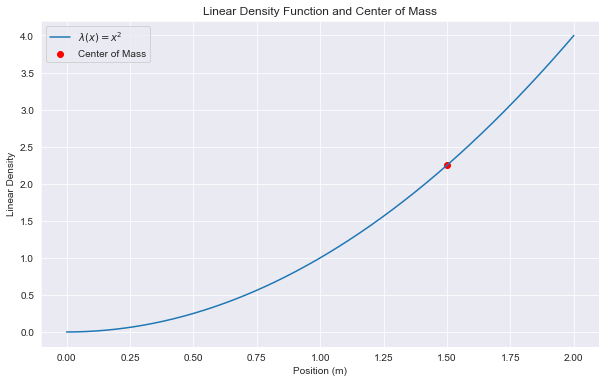

In [61]:


def f(x):
    return x**2


L = 2  #length of the rod in meters
N = 1000  

# Discretize the rod
x = np.linspace(0, L, N+1)
dx = x[1] - x[0]

num_int = x * f(x)
den_int = f(x)

num_integral = np.trapz(num_int, x)
den_integral = np.trapz(den_int, x)

cm = num_integral / den_integral

print("Center of mass:", round(cm, 4), "meters from the left end.")

#plots
plt.figure(figsize=(10, 6))
plt.plot(x, f(x), label=r'$\lambda(x) = x^2$')
plt.scatter(cm, f(cm), color='red', label='Center of Mass')
plt.xlabel('Position (m)')
plt.ylabel('Linear Density')
plt.title('Linear Density Function and Center of Mass')
plt.legend()
plt.grid(True)
plt.show()


## (5) We have a matrix equation of the for Mx = n where M is a matrix and x,n are vectors. implement LU decomp to take in the matrix M and n and solve for x using LU Decomposition

In [62]:
def lu_decomposition(A):

  n = len(A)
  L = np.zeros_like(A)
  U = np.zeros_like(A)

  for i in range(n):
    #Calculate diagonal element of U
    U[i, i] = A[i, i]
    for j in range(i + 1, n):
      #Calculate element of L
      L[j, i] = A[j, i] / U[i, i]
      #Calculate element of U
      U[j, i:n] = A[j, i:n] - L[j, i] * U[i, i:n]

  return L, U

def solve_lu(L, U, b):

  n = len(L)
  y = np.zeros_like(b)

  for i in range(n):
    y[i] = b[i] - np.dot(L[i, :i], y[:i])

  x = np.zeros_like(b)
  for i in range(n - 1, -1, -1):
    x[i] = (y[i] - np.dot(U[i, i + 1:], x[i + 1:])) / U[i, i]

  return x




M = np.matrix([[1,-1,4,0,2,9],[0,5,-2,7,8,4],[1,0,5,7,3,-2],[6,-1,2,3,0,8],[0,7,-1,5,4,-2]])
n = np.matrix([19,2,13,-7,-9,2])

L, U = lu_decomposition(M)
x = solve_lu(L, U, n.T)

print("Matrix M:")
print(M)
print("\nRight-hand side vector n:")
print(n)
print("\nSolution vector x:")
print(x)



Matrix M:
[[ 1 -1  4  0  2  9]
 [ 0  5 -2  7  8  4]
 [ 1  0  5  7  3 -2]
 [ 6 -1  2  3  0  8]
 [ 0  7 -1  5  4 -2]]

Right-hand side vector n:
[[19  2 13 -7 -9  2]]

Solution vector x:
[[ 19]
 [ 28]
 [ 38]
 [-40]
 [ 27]
 [  0]]
